# the notebook is arranged in the following order.
**1.importing libraries**
**2.loading the datasets**
**3.basic EDA**
**4.folders config**
**5.processing label files**
**6.cloning yolov5 from github**
**7.creating a YAML file--for configuration**
**8.model training**
**9.model evaluation and testing**

In [2]:
##import libraries
import os
import cv2 as cv
import glob as gb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model, layers, Sequential, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

*loading the dataset*

In [4]:
train_dir= '../input/animals-detection-images-dataset/train'
test_dir='../input/animals-detection-images-dataset/test'

**some Basic EDA**

Lion sample size :  208 

Camel sample size :  67 

Cheetah sample size :  132 

Crocodile sample size :  108 

Deer sample size :  327 

Elephant sample size :  155 

Fox sample size :  148 

Giraffe sample size :  298 

Jaguar sample size :  100 

Leopard sample size :  123 

Tiger sample size :  313 

Zebra sample size :  181 

Butterfly sample size :  1875 

Crab sample size :  309 

Eagle sample size :  719 

1875
training data size : 5063


<BarContainer object of 15 artists>

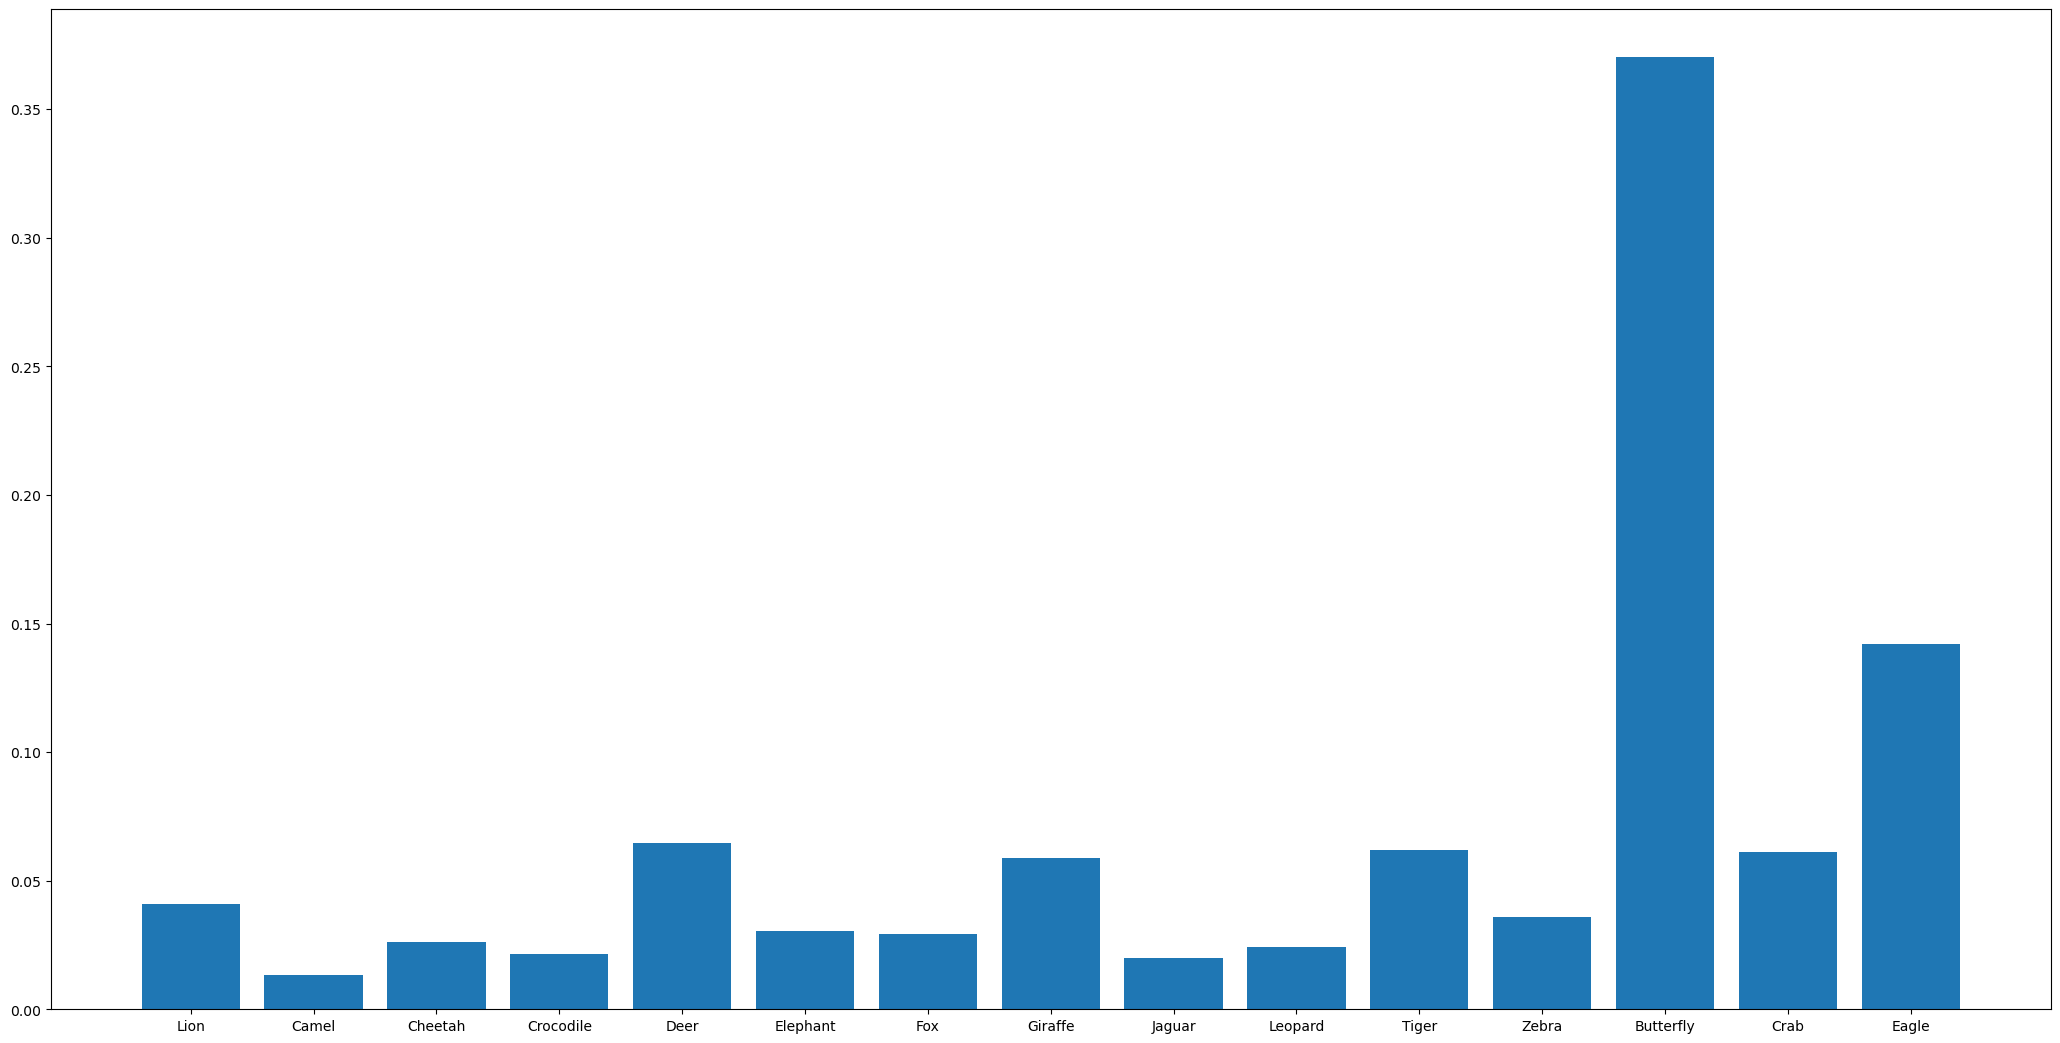

In [11]:
##CALCULATING TOTAL NO OF IMAGES
training_images_files_names_Lion = len(os.listdir("../input/animals-detection-images-dataset/train/Lion"))-1
training_images_files_names_Camel = len(os.listdir("../input/animals-detection-images-dataset/train/Camel"))-1
training_images_files_names_Cheetah = len(os.listdir("../input/animals-detection-images-dataset/train/Cheetah"))-1
training_images_files_names_Crocodile = len(os.listdir("../input/animals-detection-images-dataset/train/Crocodile"))-1
training_images_files_names_Deer = len(os.listdir("../input/animals-detection-images-dataset/train/Deer"))-1
training_images_files_names_Elephant = len(os.listdir("../input/animals-detection-images-dataset/train/Elephant"))-1
training_images_files_names_Fox = len(os.listdir("../input/animals-detection-images-dataset/train/Fox"))-1
training_images_files_names_Giraffe = len(os.listdir("../input/animals-detection-images-dataset/train/Giraffe"))-1
training_images_files_names_Jaguar = len(os.listdir("../input/animals-detection-images-dataset/train/Jaguar"))-1
training_images_files_names_Leopard = len(os.listdir("../input/animals-detection-images-dataset/train/Leopard"))-1
training_images_files_names_Tiger = len(os.listdir("../input/animals-detection-images-dataset/train/Tiger"))-1
training_images_files_names_Zebra = len(os.listdir("../input/animals-detection-images-dataset/train/Zebra"))-1
training_images_files_names_Butterfly = len(os.listdir("../input/animals-detection-images-dataset/train/Butterfly"))-1
training_images_files_names_Crab = len(os.listdir("../input/animals-detection-images-dataset/train/Crab"))-1
training_images_files_names_Eagle = len(os.listdir("../input/animals-detection-images-dataset/train/Eagle"))-1

print("Lion sample size : ",training_images_files_names_Lion,"\n")
print("Camel sample size : ",training_images_files_names_Camel,"\n")
print("Cheetah sample size : ",training_images_files_names_Cheetah,"\n")
print("Crocodile sample size : ",training_images_files_names_Crocodile,"\n")
print("Deer sample size : ",training_images_files_names_Deer,"\n")
print("Elephant sample size : ",training_images_files_names_Elephant,"\n")
print("Fox sample size : ",training_images_files_names_Fox,"\n")
print("Giraffe sample size : ",training_images_files_names_Giraffe,"\n")
print("Jaguar sample size : ",training_images_files_names_Jaguar,"\n")
print("Leopard sample size : ",training_images_files_names_Leopard,"\n")
print("Tiger sample size : ",training_images_files_names_Tiger,"\n")
print("Zebra sample size : ",training_images_files_names_Zebra,"\n")
print("Butterfly sample size : ",training_images_files_names_Butterfly,"\n")
print("Crab sample size : ",training_images_files_names_Crab,"\n")
print("Eagle sample size : ",training_images_files_names_Eagle,"\n")

print(training_images_files_names_Butterfly)
training_images_files_names_Butterfly = training_images_files_names_Butterfly

training_data_size = training_images_files_names_Lion+training_images_files_names_Camel+training_images_files_names_Cheetah+training_images_files_names_Crocodile+training_images_files_names_Deer+training_images_files_names_Elephant+training_images_files_names_Fox+training_images_files_names_Giraffe+training_images_files_names_Jaguar+training_images_files_names_Leopard+training_images_files_names_Tiger+training_images_files_names_Zebra+training_images_files_names_Butterfly+training_images_files_names_Crab+training_images_files_names_Eagle
occurences = [training_images_files_names_Lion/training_data_size ,training_images_files_names_Camel/training_data_size ,training_images_files_names_Cheetah/training_data_size ,training_images_files_names_Crocodile/training_data_size ,training_images_files_names_Deer/training_data_size ,training_images_files_names_Elephant/training_data_size ,training_images_files_names_Fox/training_data_size,training_images_files_names_Giraffe/training_data_size,training_images_files_names_Jaguar/training_data_size,training_images_files_names_Leopard/training_data_size,training_images_files_names_Tiger/training_data_size,training_images_files_names_Zebra/training_data_size,training_images_files_names_Butterfly/training_data_size,training_images_files_names_Crab/training_data_size,training_images_files_names_Eagle/training_data_size]
print("training data size :",training_data_size)
fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ax.bar(["Lion","Camel","Cheetah","Crocodile","Deer","Elephant","Fox","Giraffe","Jaguar","Leopard","Tiger","Zebra", "Butterfly", "Crab", "Eagle"],occurences)



Lion sample size :  100 

Camel sample size :  27 

Cheetah sample size :  35 

Crocodile sample size :  76 

Deer sample size :  177 

Elephant sample size :  33 

Fox sample size :  69 

Giraffe sample size :  23 

Jaguar sample size :  38 

Leopard sample size :  57 

Tiger sample size :  26 

Zebra sample size :  31 

Butterfly sample size :  170 

Crab sample size :  114 

Eagle sample size :  178 

validation data size: 2622


<BarContainer object of 15 artists>

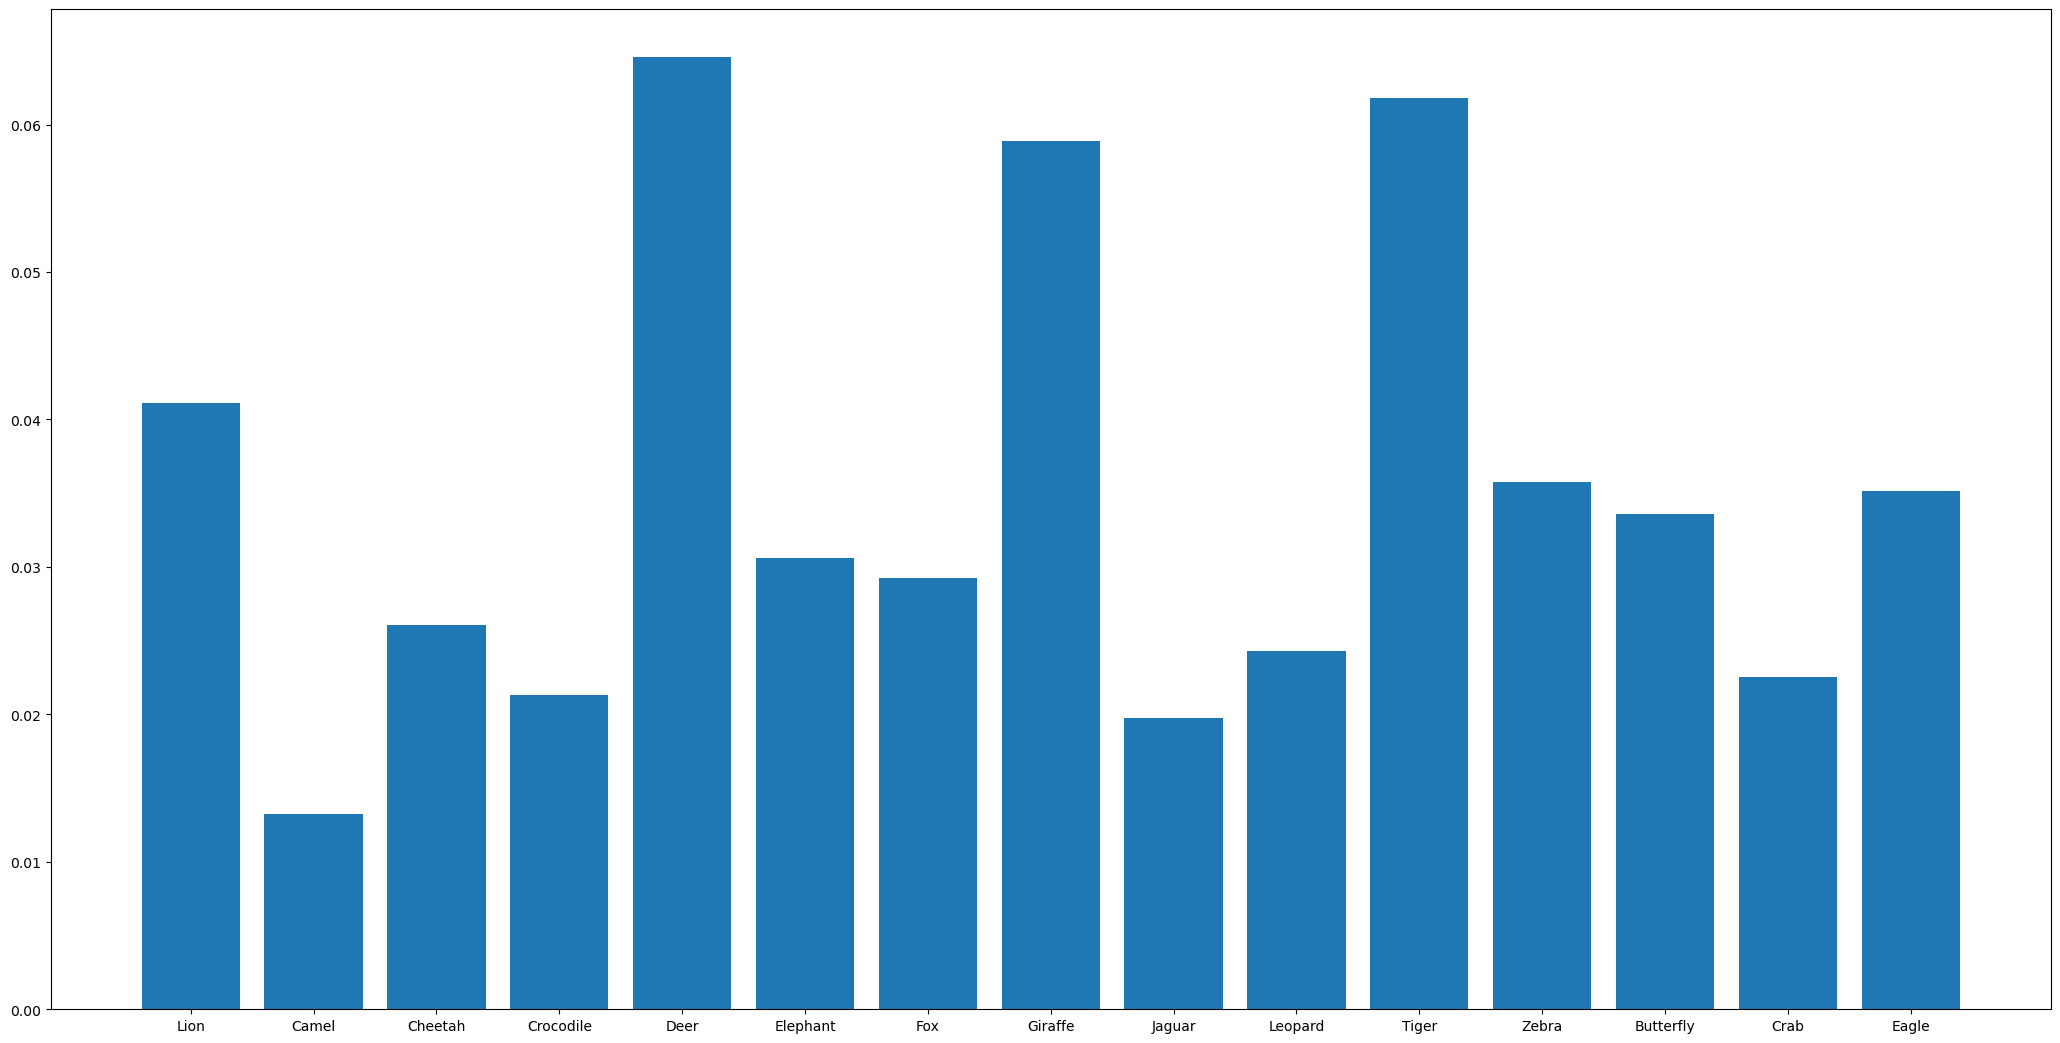

In [12]:
training_images_files_names_lion = len(os.listdir("../input/animals-detection-images-dataset/test/Lion"))-1
training_images_files_names_camel = len(os.listdir("../input/animals-detection-images-dataset/test/Camel"))-1
training_images_files_names_cheetah = len(os.listdir("../input/animals-detection-images-dataset/test/Cheetah"))-1
training_images_files_names_crocodile = len(os.listdir("../input/animals-detection-images-dataset/test/Crocodile"))-1
training_images_files_names_deer = len(os.listdir("../input/animals-detection-images-dataset/test/Deer"))-1
training_images_files_names_elephant = len(os.listdir("../input/animals-detection-images-dataset/test/Elephant"))-1
training_images_files_names_fox = len(os.listdir("../input/animals-detection-images-dataset/test/Fox"))-1
training_images_files_names_giraffe = len(os.listdir("../input/animals-detection-images-dataset/test/Giraffe"))-1
training_images_files_names_jaguar = len(os.listdir("../input/animals-detection-images-dataset/test/Jaguar"))-1
training_images_files_names_leopard = len(os.listdir("../input/animals-detection-images-dataset/test/Leopard"))-1
training_images_files_names_tiger = len(os.listdir("../input/animals-detection-images-dataset/test/Tiger"))-1
training_images_files_names_zebra = len(os.listdir("../input/animals-detection-images-dataset/test/Zebra"))-1
training_images_files_names_Butterfly = len(os.listdir("../input/animals-detection-images-dataset/test/Butterfly"))-1
training_images_files_names_Crab = len(os.listdir("../input/animals-detection-images-dataset/test/Crab"))-1
training_images_files_names_Eagle = len(os.listdir("../input/animals-detection-images-dataset/test/Eagle"))-1
print("Lion sample size : ",training_images_files_names_lion,"\n")
print("Camel sample size : ",training_images_files_names_camel,"\n")
print("Cheetah sample size : ",training_images_files_names_cheetah,"\n")
print("Crocodile sample size : ",training_images_files_names_crocodile,"\n")
print("Deer sample size : ",training_images_files_names_deer,"\n")
print("Elephant sample size : ",training_images_files_names_elephant,"\n")
print("Fox sample size : ",training_images_files_names_fox,"\n")
print("Giraffe sample size : ",training_images_files_names_giraffe,"\n")
print("Jaguar sample size : ",training_images_files_names_jaguar,"\n")
print("Leopard sample size : ",training_images_files_names_leopard,"\n")
print("Tiger sample size : ",training_images_files_names_tiger,"\n")
print("Zebra sample size : ",training_images_files_names_zebra,"\n")
print("Butterfly sample size : ",training_images_files_names_Butterfly,"\n")
print("Crab sample size : ",training_images_files_names_Crab,"\n")
print("Eagle sample size : ",training_images_files_names_Eagle,"\n")
validation_data_size = training_images_files_names_Lion+training_images_files_names_Camel+training_images_files_names_Cheetah+training_images_files_names_Crocodile+training_images_files_names_Deer+training_images_files_names_Elephant+training_images_files_names_Fox+training_images_files_names_Giraffe+training_images_files_names_Jaguar+training_images_files_names_Leopard+training_images_files_names_Tiger+training_images_files_names_Zebra+training_images_files_names_Butterfly+training_images_files_names_Crab+training_images_files_names_Eagle
occurences = [training_images_files_names_Lion/training_data_size ,training_images_files_names_Camel/training_data_size ,training_images_files_names_Cheetah/training_data_size ,training_images_files_names_Crocodile/training_data_size ,training_images_files_names_Deer/training_data_size ,training_images_files_names_Elephant/training_data_size ,training_images_files_names_Fox/training_data_size,training_images_files_names_Giraffe/training_data_size,training_images_files_names_Jaguar/training_data_size,training_images_files_names_Leopard/training_data_size,training_images_files_names_Tiger/training_data_size,training_images_files_names_Zebra/training_data_size,training_images_files_names_Butterfly/training_data_size,training_images_files_names_Crab/training_data_size,training_images_files_names_Eagle/training_data_size]
print("validation data size:",validation_data_size)
fig = plt.figure(figsize=[20,10])
ax = fig.add_axes([0,0,1,1])
ax.bar(["Lion","Camel","Cheetah","Crocodile","Deer","Elephant","Fox","Giraffe","Jaguar","Leopard","Tiger","Zebra", "Butterfly", "Crab", "Eagle"],occurences)

In [13]:
##folders config
animals_detect=["Lion","Camel", "Cheetah", "Crocodile", "Deer", "Elephant", "Fox", "Giraffe", "Jaguar", "Leopard", "Tiger", "Zebra", "Butterfly", "Crab", "Eagle"]

In [14]:
os.mkdir("yolo")
os.mkdir("yolo/test")
os.mkdir("yolo/test/images")
os.mkdir("yolo/test/labels")
os.mkdir("yolo/train")
os.mkdir("yolo/train/images")
os.mkdir("yolo/train/labels")

In [15]:
!cd ./
!ls

yolo


In [16]:
size = (640,640)
for animal_specie in animals_detect:
    image_file_name = os.listdir(train_dir+"/"+animal_specie)
    for i in range(0,len(image_file_name)):
            if image_file_name[i] != "Label":
                img = cv2.imread(train_dir+"/"+animal_specie+"/"+image_file_name[i], cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, size)
                cv2.imwrite("yolo/train/images/"+image_file_name[i], img) 

    image_file_name = os.listdir(test_dir+"/"+animal_specie)
    for i in range(0,len(image_file_name)):
            if image_file_name[i] != "Label":
                img = cv2.imread(test_dir+"/"+animal_specie+"/"+image_file_name[i], cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, size)
                cv2.imwrite("yolo/test/images/"+image_file_name[i], img) 

In [17]:
animals_detect = ["Lion","Camel","Cheetah","Crocodile","Deer","Elephant","Fox","Giraffe","Jaguar","Leopard","Tiger","Zebra", "Butterfly", "Crab", "Eagle"]
animals_encoding = {"Lion":0,"Camel":1,"Cheetah":2,"Crocodile":3,"Deer":4,"Elephant":5,"Fox":6,"Giraffe":7,"Jaguar":8,"Leopard":9,"Tiger":10,"Zebra":11,"Butterfly":12, "Crab":13, "Eagle":14}

In [18]:
def process_files(input_files_path,output_files_path):
    for animal_specie in animals_detect:
        txt_file_name = os.listdir(input_files_path+"/"+animal_specie+"/Label")
        for i in range(0,len(txt_file_name)):
                with open(input_files_path+"/"+animal_specie + "/Label/" + txt_file_name[i], "r") as source:
                       with open(output_files_path+"/"+ txt_file_name[i], "w") as destination :
                            image_file_name_no_ext = txt_file_name[i][0:len(txt_file_name[i])-4]
                            img = cv2.imread(input_files_path+"/"+animal_specie+"/"+image_file_name_no_ext+".jpg", cv2.IMREAD_COLOR)
                            height = img.shape[0]
                            width = img.shape[1]
                            for line in source:
                                        labeling_data = line.split()
                                        labeling_data[0] = animals_encoding[labeling_data[0]]
                                        xmin = float(labeling_data[1])
                                        ymin = float(labeling_data[2])
                                        xmax = float(labeling_data[3])
                                        ymax = float(labeling_data[4])
                                        cx = (xmin + xmax)/2.0/width
                                        cy = (ymin + ymax)/2.0/height
                                        box_width = (xmax - xmin)/width
                                        box_height = (ymax - ymin)/height
                                        destination.write(str(labeling_data[0])+" ")
                                        destination.write(str(cx)+" ")
                                        destination.write(str(cy)+" ")
                                        destination.write(str(box_width)+" ")
                                        destination.write(str(box_height)+"\n")

In [19]:
process_files("../input/animals-detection-images-dataset/train","yolo/train/labels")
##now for the  train test
process_files("../input/animals-detection-images-dataset/test","yolo/test/labels")

In [ ]:
import requests

try:
    response = requests.get("https://github.com")
    if response.status_code == 200:
        print("Connection successful!")
    else:
        print(f"Connection failed with status code: {response.status_code}")
except Exception as e:
    print(f"Connection failed with error: {e}")


In [20]:
import git
# git.Repo.clone_from('https://github.com/ultralytics/yolov5.git', '/kaggle/working/')
# gh repo clone ultralytics/yolov5

# !git clone git@github.com:ultralytics/yolov5.git
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
# %pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16408, done.
remote: Total 16408 (delta 0), reused 0 (delta 0), pack-reused 16408
Receiving objects: 100% (16408/16408), 14.94 MiB | 27.18 MiB/s, done.
Resolving deltas: 100% (11260/11260), done.
/kaggle/working/yolov5


In [21]:
%ls

CITATION.cff     README.zh-CN.md  detect.py   pyproject.toml    tutorial.ipynb
CONTRIBUTING.md  benchmarks.py    export.py   requirements.txt  utils/
LICENSE          classify/        hubconf.py  segment/          val.py
README.md        data/            models/     train.py


In [22]:
!cat data/coco128.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license
# COCO128 dataset https://www.kaggle.com/ultralytics/coco128 (first 128 images from COCO train2017) by Ultralytics
# Example usage: python train.py --data coco128.yaml
# parent
# ├── yolov5
# └── datasets
#     └── coco128  ← downloads here (7 MB)

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/coco128 # dataset root dir
train: images/train2017 # train images (relative to 'path') 128 images
val: images/train2017 # val images (relative to 'path') 128 images
test: # test images (optional)

# Classes
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  

In [23]:
!touch data/animals.yaml
%ls data

Argoverse.yaml        ImageNet1000.yaml  animals.yaml      images/
GlobalWheat2020.yaml  Objects365.yaml    coco.yaml         scripts/
ImageNet.yaml         SKU-110K.yaml      coco128-seg.yaml  xView.yaml
ImageNet10.yaml       VOC.yaml           coco128.yaml
ImageNet100.yaml      VisDrone.yaml      hyps/


In [24]:
"""
path: ../yolo
train: train/images  # train images (relative to 'path') 128 images
val: test/images  # val images (relative to 'path') 128 images
names:
  0: Lion
  1: Camel
  2: Cheetah
  3: Crocodile
  4: Deer
  5: Elephant
  6: Fox
  7: Giraffe
  8: Jaguar
  9: Leopard
  10:Tiger
  11: Zebra
  12: Butterfly
  13: Crab
  14: Eagle
"""

"\npath: ../yolo\ntrain: train/images  # train images (relative to 'path') 128 images\nval: test/images  # val images (relative to 'path') 128 images\nnames:\n  0: Lion\n  1: Camel\n  2: Cheetah\n  3: Crocodile\n  4: Deer\n  5: Elephant\n  6: Fox\n  7: Giraffe\n  8: Jaguar\n  9: Leopard\n  10:Tiger\n  11: Zebra\n  12: Butterfly\n  13: Crab\n  14: Eagle\n"

In [25]:
with open("data/animals.yaml", "w") as yaml_file:
    yaml_file.write("path: ../yolo  # train images (relative to 'path') 128 images"+"\n")
    yaml_file.write("train: train/images  # train images (relative to 'path') 128 images"+"\n")
    yaml_file.write("val: test/images  # val images (relative to 'path') 128 images"+"\n")
    yaml_file.write("names:"+"\n")
    yaml_file.write(" 0: Lion"+"\n")
    yaml_file.write(" 1: Camel"+"\n")
    yaml_file.write(" 2: Cheetah"+"\n")
    yaml_file.write(" 3: Crocodile"+"\n")
    yaml_file.write(" 4: Deer"+"\n")
    yaml_file.write(" 5: Elephant"+"\n")
    yaml_file.write(" 6: Fox"+"\n")
    yaml_file.write(" 7: Giraffe"+"\n")
    yaml_file.write(" 8: Jaguar"+"\n")
    yaml_file.write(" 9: Leopard"+"\n")
    yaml_file.write(" 10: Tiger"+"\n")
    yaml_file.write(" 11: Zebra"+"\n")
    yaml_file.write(" 12: Butterfly"+"\n")
    yaml_file.write(" 13: Crab"+"\n")
    yaml_file.write(" 14: Eagle"+"\n")

In [27]:
!ls
!cat data/animals.yaml

CITATION.cff	 README.zh-CN.md  detect.py   pyproject.toml	tutorial.ipynb
CONTRIBUTING.md  benchmarks.py	  export.py   requirements.txt	utils
LICENSE		 classify	  hubconf.py  segment		val.py
README.md	 data		  models      train.py
path: ../yolo  # train images (relative to 'path') 128 images
train: train/images  # train images (relative to 'path') 128 images
val: test/images  # val images (relative to 'path') 128 images
names:
 0: Lion
 1: Camel
 2: Cheetah
 3: Crocodile
 4: Deer
 5: Elephant
 6: Fox
 7: Giraffe
 8: Jaguar
 9: Leopard
 10: Tiger
 11: Zebra
 12: Butterfly
 13: Crab
 14: Eagle


In [28]:
!python train.py --img 640 --batch 32 --epochs 30 --data animals.yaml --weights yolov5s.pt --project runs/train

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.7/616.7 kB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.9/614.9 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.4/614.4 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.9/606.9 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.2/606.2 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.6/605.6 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 17.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yol

In [29]:
%cp /kaggle/working/yolov5/runs/train/exp/weights/best.pt /kaggle/working/

In [1]:
results_yolov5s = os.listdir("runs/train/exp")

NameError: name 'os' is not defined

In [ ]:
##verifying the weights were stored correctly
%ls runs/train/exp/weights

In [ ]:
%ls runs/train/exp

In [ ]:
img = mpimg.imread('runs/train/exp/val_batch0_labels.jpg')
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()


In [ ]:
img = mpimg.imread('runs/train/exp/train_batch0.jpg')
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img = mpimg.imread('runs/train/exp/train_batch1.jpg')
figure_size = 8
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img = mpimg.imread('runs/train/exp/train_batch2.jpg')
figure_size = 8
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

**Plots to analyze the performance of the model**

In [ ]:
###Plot for the f1 scores achieved during the training
img = mpimg.imread('runs/train/exp/F1_curve.png')
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

In [ ]:
##precision recall curve
img = mpimg.imread('runs/train/exp/PR_curve.png')
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

In [ ]:
###PLOT for precission achieved during training
img = mpimg.imread('runs/train/exp/P_curve.png')
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img = mpimg.imread('runs/train/exp/R_curve.png')
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()